In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

In [2]:
df = pd.read_csv("ratings_Beauty.csv")
df

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
2023065,A3DEHKPFANB8VA,B00LORWRJA,5.0,1405296000
2023066,A3DEHKPFANB8VA,B00LOS7MEE,5.0,1405296000
2023067,AG9TJLJUN5OM3,B00LP2YB8E,5.0,1405382400
2023068,AYBIB14QOI9PC,B00LPVG6V0,5.0,1405555200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023070 entries, 0 to 2023069
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   UserId     object 
 1   ProductId  object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.7+ MB


In [5]:
df.describe()

,Rating,Timestamp
count,2.023070e+06,2.023070e+06
mean,4.149036e+00,1.360389e+09
std,1.311505e+00,4.611860e+07
min,1.000000e+00,9.087552e+08
25%,4.000000e+00,1.350259e+09
50%,5.000000e+00,1.372810e+09
75%,5.000000e+00,1.391472e+09
max,5.000000e+00,1.406074e+09


<Axes: >

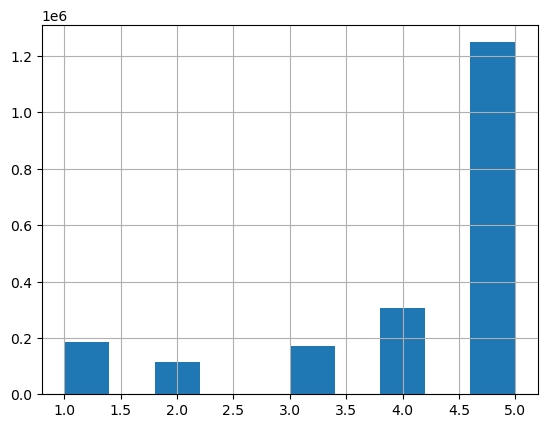

In [3]:
df.Rating.hist()

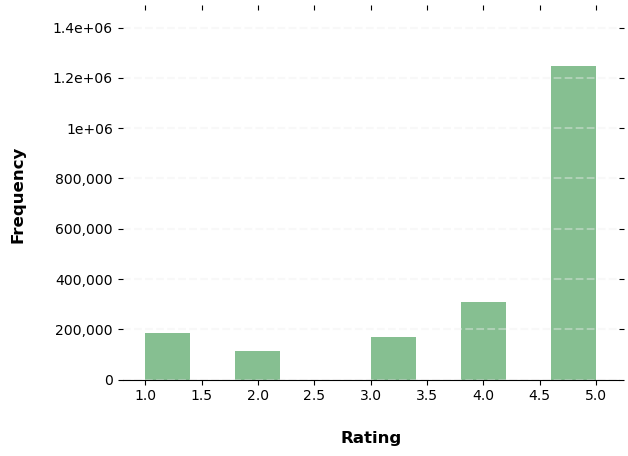

In [11]:
ax = df.hist(column='Rating', grid=False, color='#86bf91')

for x in ax[0]:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("Rating", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [9]:
# Check for duplicates
df.duplicated(subset=['UserId', 'ProductId']).sum()

0

Get unique no: of users and products

In [10]:
# Unique users
df.UserId.nunique()

1210271

In [11]:
# Unique products
df.ProductId.nunique()

249274

In [17]:
agg_df['sales'] = pd.DataFrame(df.groupby('ProductId')['Rating'].count())
agg_df

,Rating,sales
ProductId,,
0205616461,1,1
0558925278,2,2
0733001998,1,1
0737104473,1,1
0762451459,1,1
...,...,...
B00LORWRJA,1,1
B00LOS7MEE,1,1
B00LP2YB8E,1,1


In [20]:
agg_df = agg_df.drop('Rating', axis=1)

In [23]:
best_seller_df = agg_df.sort_values('sales', ascending=False).head(10)
best_seller_df

,sales
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Axes: xlabel='ProductId'>

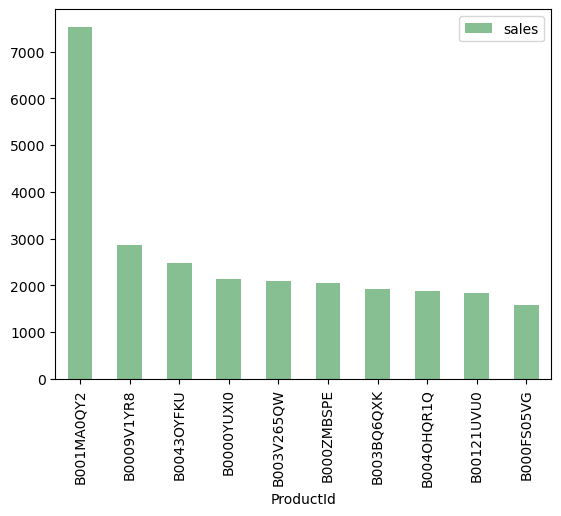

In [26]:
best_seller_df.plot(y='sales', kind="bar", color='#86bf91')

In [28]:
user_agg_df['Transactions'] = pd.DataFrame(df.groupby('UserId')['Rating'].count())
user_agg_df

,Rating,Transactions
UserId,,
A00008821J0F472NDY6A2,1,1
A000186437REL8X2RW8UW,1,1
A0002574WYJMBWKNCPY8,1,1
A00029263J863WSR0TDRS,1,1
A00031961JI1CBNV98TW,1,1
...,...,...
AZZZLZXCEE4WK,2,2
AZZZMSZI9LKE6,4,4
AZZZO4QCZROW8,1,1


In [29]:
user_agg_df = user_agg_df.drop('Rating', axis=1)

In [30]:
most_active_users_df = user_agg_df.sort_values('Transactions', ascending=False).head(10)
most_active_users_df

,Transactions
UserId,
A3KEZLJ59C1JVH,389
A281NPSIMI1C2R,336
A3M174IC0VXOS2,326
A2V5R832QCSOMX,278
A3LJLRIZL38GG3,276
ALQGOMOY1F5X9,275
AKMEY1BSHSDG7,269
A3R9H6OKZHHRJD,259
A1M04H40ZVGWVG,249


<Axes: xlabel='UserId'>

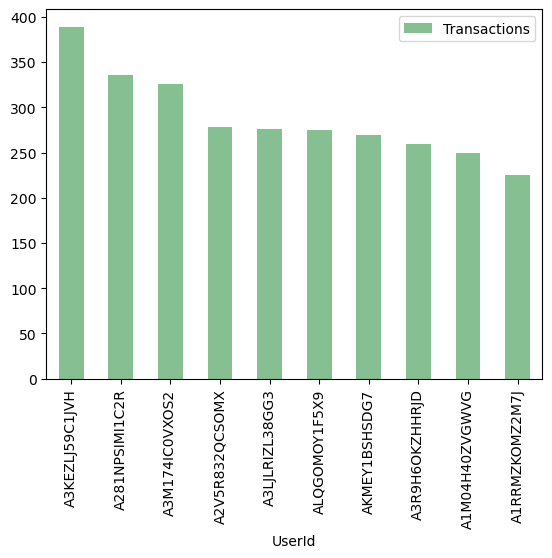

In [31]:
most_active_users_df.plot(y='Transactions', kind="bar", color='#86bf91')